In [10]:
import numpy as np
import pandas as pd

hyperparameter optimization is done to get best parameters for ML algorithms

In [11]:
df=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


dataset is about customer will stay in the bank in future or not based on current offers and policies of bank for that particular customer. This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.So we can do work on this data so he stays in the particular bank

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:>

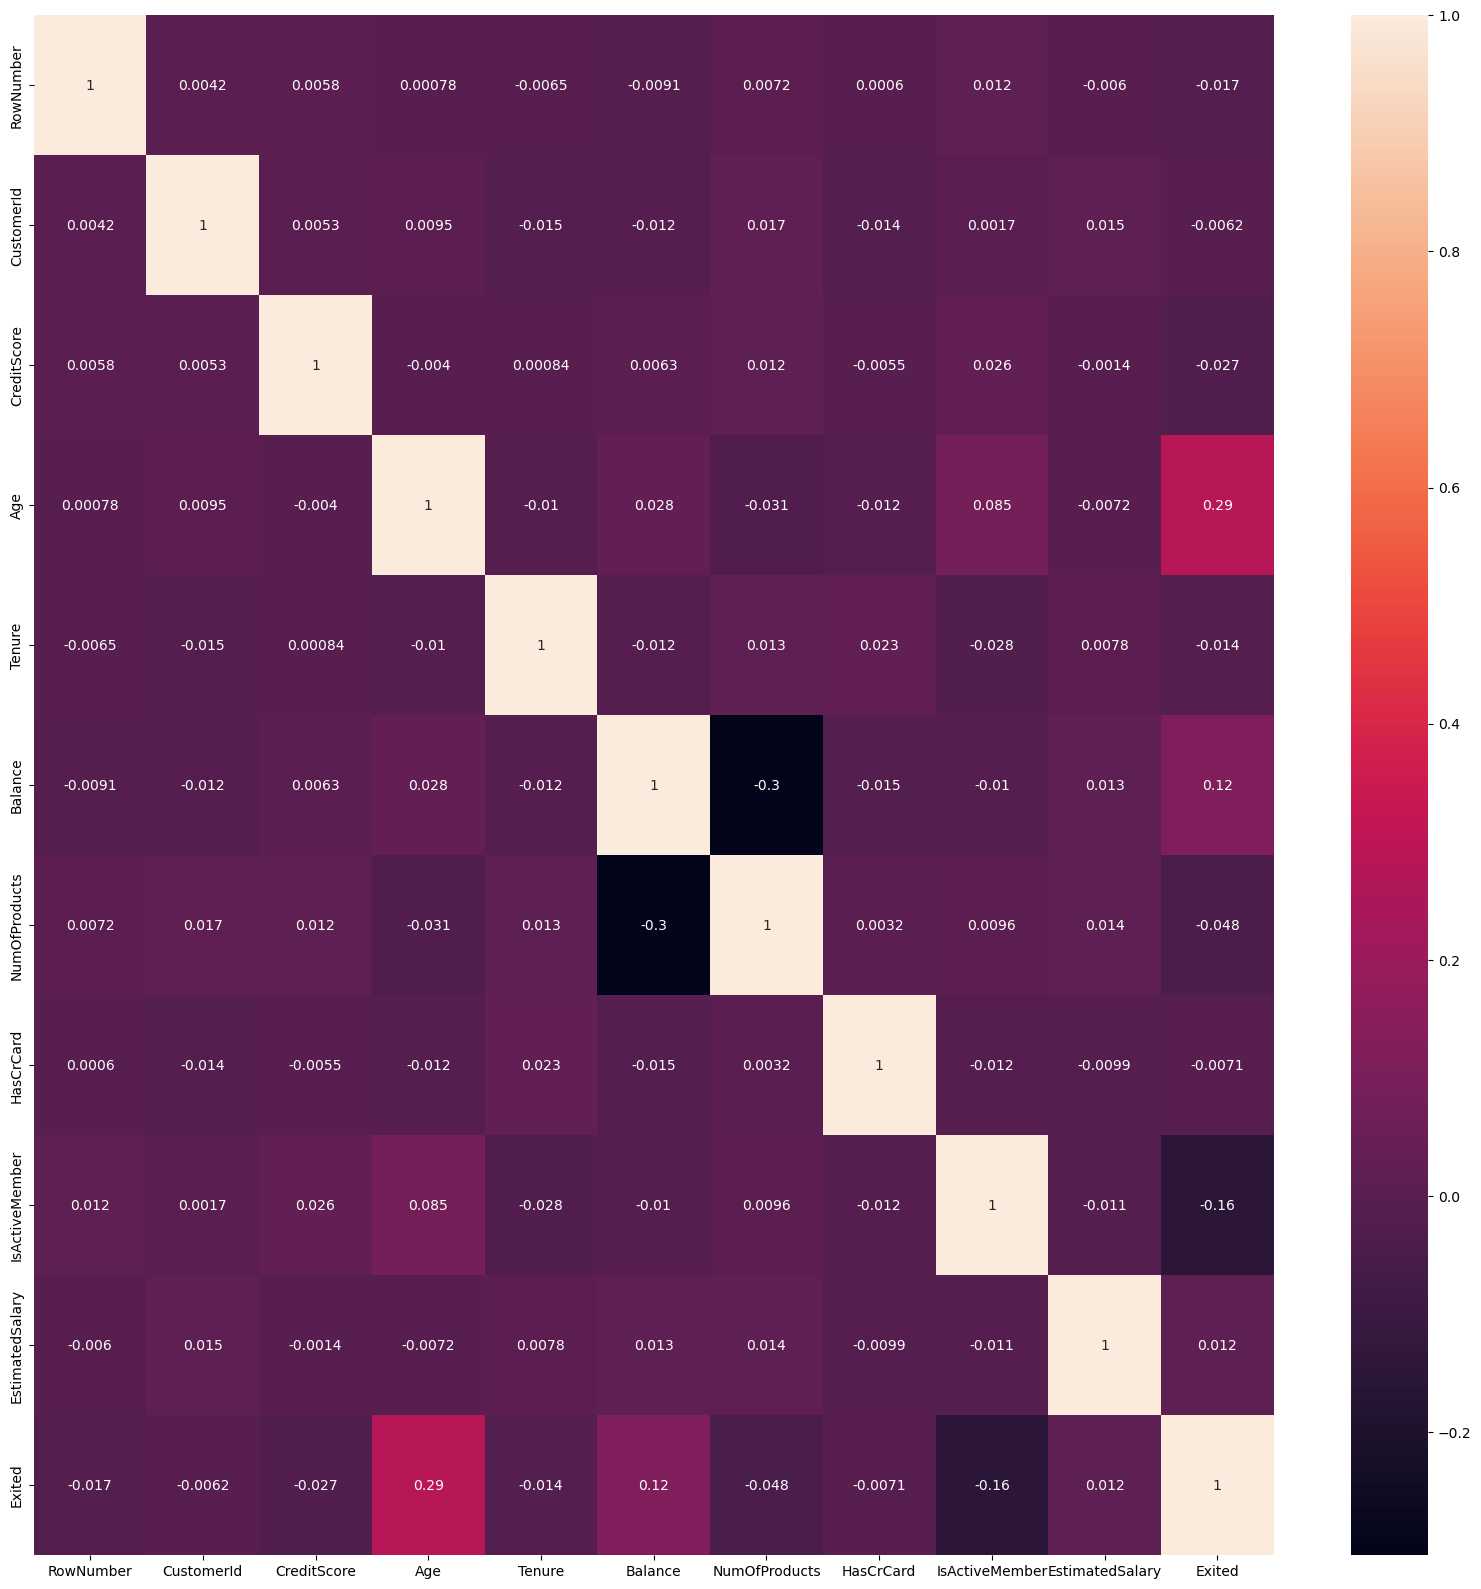

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True)

In [14]:
# independent features and dependent features
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [15]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
# taking care of categorical features
geo=pd.get_dummies(x['Geography'],drop_first=True)
# we do drop_first = true coz we can get info from remaining columns only
gender=pd.get_dummies(x['Gender'],drop_first=True)
print(geo)
print(gender)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


now we can drop those columns as later we will append the above columns in our dataset

In [18]:
x.drop(['Geography','Gender'],axis=1,inplace=True)
# we dropped geography and gender from dataset
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [19]:
x=pd.concat([x,geo,gender],axis=1)
# axis =1 means column wise
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


now we have all features with us in optimised version , we can start working on model buidling 

In [20]:
# hyperparameters
# these parameters are present in xgboost classifier
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#     don't lower learning rate value than 0.05 , otherwise leads to overfitting case
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [21]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

in xgboost there are many parameter and to get best value for any parameter we need to perform hyperparameter optimization using RandomizedSearchCV and GridSearchCV

creating timer function to find out how much time it takes to perform RandomizedSearchCV

In [22]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [23]:
classifier=xgboost.XGBClassifier()

In [24]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# cv=cross validation, jobs makes sure it uses all the code present
# verbose gives message about fitting

In [25]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 12.3 seconds.


In [26]:
random_search.best_estimator_
# this gives the best parameters selected using RandomizedSearchCV

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [30]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)
score

array([0.877, 0.863, 0.865, 0.863, 0.853, 0.859, 0.86 , 0.878, 0.867,
       0.857])

In [33]:
score.mean()

0.8642

Randomized search CV is much faster than gridSearchCV. procedure for both is same.

**Thank you!! Would love to gain from your feedback. Please do upvote if you liked it.**